In [1]:
# import system libraries
import sys
import os
import glob

# import Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        

%matplotlib inline

# Set paths for custom modules
sys.path.insert(0, './helpers')
sys.path.insert(0, './models')

# Image Loader functions
from image_loader import dir_loader_stack
from image_loader import csv_loader_stack
from image_loader import image_plot

# Model classes
from resnet50 import Resnet50_pretrained

# Model helpers
from model_helpers import train
from model_helpers import predict


# torch temp
import torch.nn as nn
import torch.optim as optim
import torch

### Data From CSV Example

In [2]:
# Labels from CSV

df_lab = pd.read_csv('../datasets/animals/labels.csv')
df_lab.head()


,FilePath,Label
0,cats/cats_00072.jpg,cat
1,cats/cats_00073.jpg,cat
2,cats/cats_00074.jpg,cat
3,cats/cats_00075.jpg,cat
4,cats/cats_00076.jpg,cat


In [3]:
df_lab.Label = pd.Categorical(pd.factorize(df_lab.Label)[0])

In [4]:
df_lab.head()

,FilePath,Label
0,cats/cats_00072.jpg,0
1,cats/cats_00073.jpg,0
2,cats/cats_00074.jpg,0
3,cats/cats_00075.jpg,0
4,cats/cats_00076.jpg,0


In [5]:
df_lab.tail()

,FilePath,Label
2845,panda/panda_00996.jpg,2
2846,panda/panda_00997.jpg,2
2847,panda/panda_00998.jpg,2
2848,panda/panda_00999.jpg,2
2849,panda/panda_01000.jpg,2


In [6]:
df_lab.shape

(2850, 2)

In [7]:
# params

img_size = 244
batch_size = 32
num_workers = 0

# Dataset folder
data_dir = '../datasets/animals/'

# # Set subfolders for train, val & test
# train_dir = os.path.join(data_dir, 'train/')
# val_dir = os.path.join(data_dir, 'valid/')
# test_dir = os.path.join(data_dir, 'test/')

In [8]:
# train test split
# Train & val


In [9]:
train_loader = csv_loader_stack(data_dir,df_lab, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,True)

val_loader = csv_loader_stack(data_dir,df_lab, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,False)

# test_loader = NEED HOLDOUT SET


loaders = {
    'train':train_loader,
    'valid':val_loader,
    #'test':test_loader,
}

In [10]:
# images, labels = next(iter(train_loader))

# # Display image and label
# plt.imshow(images[0].permute(1, 2, 0))
# print(labels[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


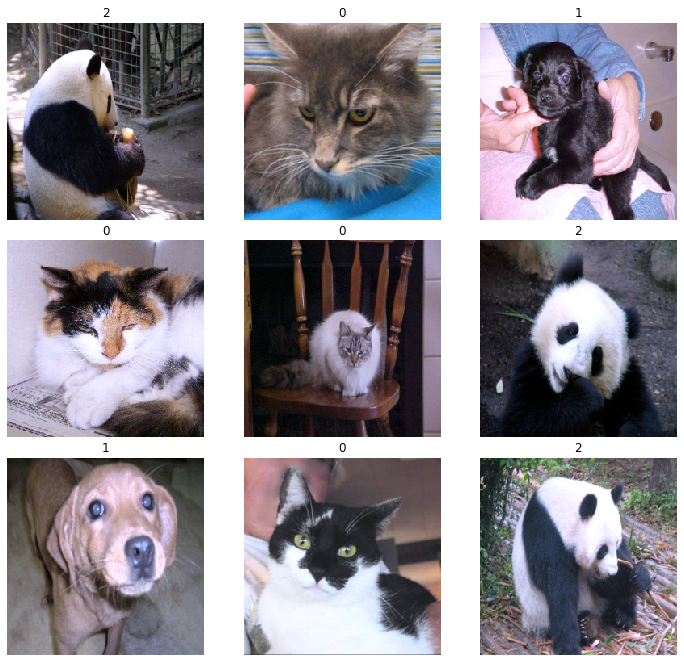

In [11]:
image_plot(train_loader)

### Create Model

In [12]:
# Model Parms

# Number Classes to predict
num_classes = 3

# Compute device (cuda = GPU)
device = 'cuda'

In [13]:
# create model from object

In [14]:
res_model = Resnet50_pretrained(num_classes)

In [15]:
res_model = res_model.build()

### Train Model

In [16]:
# Train Params
n_epochs = 3
learn_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(res_model.fc.parameters(), lr=learn_rate)

device = 'cuda'
save_path = 'test_train.pt'

In [17]:
H = train(res_model, n_epochs, loaders, optimizer,
                    criterion, device, save_path)

./helpers\model_helpers.py:72: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],


Epoch #1, Batch #1 train_loss: 1.165402 train_acc: 0.25
Epoch #1, Batch #51 train_loss: 0.927985 train_acc: 0.672794


./helpers\model_helpers.py:102: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],


Epoch: 1 val_loss: 0.525923 val_acc: 0.937500
Epoch: 1 val_loss: 0.585456 val_acc: 0.935662
SAVE MODEL: val_loss decrease (0.535944) val_acc: 0.949123
Epoch #2, Batch #1 train_loss: 0.537686 train_acc: 0.96875
Epoch #2, Batch #51 train_loss: 0.484591 train_acc: 0.951593
Epoch: 2 val_loss: 0.278507 val_acc: 0.968750
Epoch: 2 val_loss: 0.387465 val_acc: 0.959559
SAVE MODEL: val_loss decrease (0.356551) val_acc: 0.964912
Epoch #3, Batch #1 train_loss: 0.436916 train_acc: 0.90625
Epoch #3, Batch #51 train_loss: 0.344947 train_acc: 0.963848
Epoch: 3 val_loss: 0.272954 val_acc: 0.937500
Epoch: 3 val_loss: 0.315705 val_acc: 0.966299
SAVE MODEL: val_loss decrease (0.257905) val_acc: 0.975088


In [18]:
# 

In [19]:
H

{'train_loss': [0.799204409122467, 0.45849502086639404, 0.3307993710041046],
 'train_acc': [0.7842105263157895, 0.9515789473684211, 0.9635087719298245],
 'val_loss': [0.5359435677528381, 0.3565509617328644, 0.2579050362110138],
 'val_acc': [0.9491228070175438, 0.9649122807017544, 0.9750877192982456]}

In [24]:
def plot_train_history(history,NUM_EPOCHS):
        # plot the training loss and accuracy
        plt.style.use("ggplot")
        plt.figure()
        plt.plot(np.arange(0, NUM_EPOCHS),
                    history["train_loss"],
                    label="train_loss")
        plt.plot(np.arange(0, NUM_EPOCHS),
                    history["val_loss"],
                    label="val_loss")
        plt.plot(np.arange(0, NUM_EPOCHS),
                    history["train_acc"],
                    label="train_acc")
        plt.plot(np.arange(0, NUM_EPOCHS),
                    history["val_accuracy"],
                    label="val_acc")
        plt.title("Training Loss and Accuracy")
        plt.xlabel("Epoch #")
        plt.ylabel("Loss/Accuracy")
        plt.legend()
        plt.show()
        plt.close()

In [25]:
plot_train_history(H,3)

KeyError: 'loss'

<Figure size 432x288 with 0 Axes>

In [20]:
break

SyntaxError: 'break' outside loop (<ipython-input-20-6aaf1f276005>, line 4)

### Save Model

In [ ]:
# TODO Create model method

res_model.save('test_save.pt')

### Load Model


In [ ]:
# TODO Create model method

res_model.load('test_save.pt',True)

### Train Logs

In [ ]:
### TODO make log function 

### Test Model

In [ ]:
# get images image folder
images = glob.glob("images/*")

In [ ]:
for image in images:
    predict(res_model,image,device)